<a href="https://colab.research.google.com/github/bismahashim/Assignment/blob/main/Assignment__Decision_tree_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
df=pd.read_csv('Company_Data.csv')

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df.shape

(400, 11)

In [9]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [ ]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data=df, hue = 'ShelveLoc')

In [10]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [11]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [13]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})


In [14]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [17]:
##Checking for maximum and minimum values to decide what will be the cut off point
df["Sales"].min()
df["Sales"].max()
df["Sales"].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [19]:
df["Sales"].max()

16.27

In [20]:
np.median(df["Sales"])
df["sales"]= "<=7.49"
df.loc[df["Sales"]>=7.49,"sales"]=">=7.49"

In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,9.50,138,73,11,276,120,3,42,17,1,1,>=7.49
1,11.22,111,48,16,260,83,1,65,10,1,1,>=7.49
2,10.06,113,35,10,269,80,2,59,12,1,1,>=7.49
3,7.40,117,100,4,466,97,2,55,14,1,1,<=7.49
4,4.15,141,64,3,340,128,3,38,13,1,0,<=7.49


In [24]:
df["sales"].unique()
df["sales"].value_counts()


>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [25]:
##Dropping Sales column from the data 
df.drop(["Sales"],axis=1,inplace = True)


In [26]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,138,73,11,276,120,3,42,17,1,1,>=7.49
1,111,48,16,260,83,1,65,10,1,1,>=7.49
2,113,35,10,269,80,2,59,12,1,1,>=7.49
3,117,100,4,466,97,2,55,14,1,1,<=7.49
4,141,64,3,340,128,3,38,13,1,0,<=7.49


In [27]:
##As, the fit does not consider the String data, we need to encode the data.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [28]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,138,73,11,276,120,3,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,3,38,13,1,0,0


In [34]:
x=df.iloc[:,0:10]
y= df.iloc[:,10]

In [35]:
x


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [36]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales, Length: 400, dtype: int64

In [37]:
x.value_counts()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban_Yes  US_Yes
77         69      0            25          24     2          50   18         1          0         1
132        31      0            327         131    2          76   16         1          0         1
           113     0            131         124    2          76   17         0          1         1
           110     0            108         124    2          76   10         0          0         1
           107     0            144         125    2          33   13         0          0         1
                                                                                                  ..
118        74      6            426         102    2          80   18         1          1         1
           71      12           44          89     2          67   18         0          1         1
                   4            148         114    2          80   13         1          0      

In [38]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'sales']

In [40]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [41]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
389,128,42,8,328,107,2,35,12,1,1
21,134,29,12,239,109,1,62,18,0,1
142,124,84,0,300,104,2,77,15,1,0
163,130,64,0,40,106,3,39,17,0,0
382,121,28,19,315,121,2,66,14,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,3,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [42]:
y_train

389    1
21     1
142    0
163    0
382    0
      ..
306    0
165    0
7      1
219    1
326    0
Name: sales, Length: 280, dtype: int64

In [43]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
132,125,87,9,232,136,1,72,10,1,1
390,108,75,9,61,111,2,67,12,1,1
310,175,65,29,419,166,2,53,12,1,1
3,117,100,4,466,97,2,55,14,1,1
248,111,52,0,12,101,2,61,11,1,1
...,...,...,...,...,...,...,...,...,...,...
381,124,65,21,496,151,3,77,13,1,1
53,109,64,13,39,119,2,61,17,1,1
229,98,104,0,404,72,2,27,18,0,0
303,133,52,16,290,99,2,43,11,1,1


In [44]:
y_test

132    1
390    0
310    1
3      0
248    0
      ..
381    0
53     0
229    1
303    1
37     0
Name: sales, Length: 120, dtype: int64

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

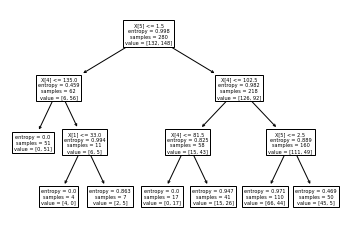

In [46]:
#PLot the decision tree
tree.plot_tree(model);


In [47]:
y_train.value_counts()

1    148
0    132
Name: sales, dtype: int64

In [48]:
##prediction on Training data
pred_train = pd.DataFrame(model.predict(x_train))

In [49]:
pred_train

,0
0,0
1,1
2,0
3,0
4,0
...,...
275,0
276,0
277,1
278,1


In [51]:
##Finding Accuracy for train data
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,pred_train)
##100%

In [52]:
acc_train

0.7642857142857142

In [54]:
from sklearn.metrics import confusion_matrix

confusion_mat = pd.DataFrame(confusion_matrix(y_train,pred_train,))


In [55]:
confusion_mat

,0,1
0,115,17
1,49,99


In [56]:
pred_test = pd.DataFrame(model.predict(x_test))

In [57]:
##Accuracy on test data
acc_test = accuracy_score(y_test,pred_test)

In [58]:
acc_test

0.7083333333333334

In [59]:
confusion_test = pd.DataFrame(confusion_matrix(y_test,pred_test))

In [60]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    64
1    56
dtype: int64

In [61]:
preds


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [62]:
  pd.crosstab(y_test,preds)

col_0,0,1
sales,,
0,48,19
1,16,37


In [63]:
np.mean(preds==y_test)

0.7083333333333334

In [64]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [65]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [66]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7083333333333334

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
array = df.values
X = array[:,0:10]
y = array[:,10]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [80]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [81]:
model.score(X_test,y_test)

-0.1528822055137844